# Analyzing Historical Stock/Revenue Data and Building a Dashboard

## Question 1: Extracting Tesla Stock Data Using yfinance

In [23]:
# import libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [6]:
# Extract Tesla stock data
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="1y")  # Get the last year of stock data
tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-23 00:00:00-04:00,210.000000,216.979996,202.509995,212.080002,150683400,0.0,0.0
2023-10-24 00:00:00-04:00,216.500000,222.050003,214.110001,216.520004,118231100,0.0,0.0
2023-10-25 00:00:00-04:00,215.880005,220.100006,212.199997,212.419998,107065100,0.0,0.0
2023-10-26 00:00:00-04:00,211.320007,214.800003,204.880005,205.759995,115112600,0.0,0.0
2023-10-27 00:00:00-04:00,210.600006,212.410004,205.770004,207.300003,94881200,0.0,0.0


## Question 2: Extracting Tesla Revenue Data Using Webscraping

In [ ]:
# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
# Send a GET request to the URL
response = requests.get(url)
# Save the text of the response in a variable
html_data = response.text
# Print the first few characters of the response to verify
print(html_data[:500])  # Print a snippet of the HTML content

In [ ]:
# Parse the HTML data using BeautifulSoup and the 'html.parser'
soup = BeautifulSoup(html_data, 'html.parser')
# Print the first few elements of the parsed HTML to verify
print(soup.prettify()[:500])  # Print a snippet of the prettified HTML

In [13]:
# Use pandas read_html to extract tables from the HTML
tables = pd.read_html(html_data)
# Assuming the table you need is the first one (index 0), you can extract it
tesla_revenue = tables[0]
# Rename the columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']
# Display the dataframe to verify
tesla_revenue.tail()

C:\Users\abbas\AppData\Local\Temp\ipykernel_1528\4051062568.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [10]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [11]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [14]:
tesla_revenue.tail()

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


## Question 3: Use yfinance to Extract Stock Data

In [ ]:
# Create a ticker object for GameStop
gamestop_ticker = yf.Ticker("GME")
# Display basic info
gamestop_info = gamestop_ticker.info
print(gamestop_info)

In [ ]:
# Create a ticker object for GameStop
gamestop_ticker = yf.Ticker("GME")
# Extract historical stock data with the period set to 'max'
gme_data = gamestop_ticker.history(period="max")
# Display the first few rows of the dataframe to verify
print(gme_data.head())

In [18]:
# Create a ticker object for GameStop
gamestop_ticker = yf.Ticker("GME")
# Extract historical stock data with the period set to 'max'
gme_data = gamestop_ticker.history(period="max")
# Reset the index of the dataframe
gme_data.reset_index(inplace=True)
# Display the first five rows of the dataframe
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [ ]:
# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
# Send a GET request to the URL
response = requests.get(url)
# Save the text of the response in a variable
html_data_2 = response.text
# Print the first few characters of the response to verify
print(html_data_2[:500])  # Print a snippet of the HTML content

In [ ]:
# Parse the HTML data using BeautifulSoup and 'html.parser'
soup_2 = BeautifulSoup(html_data_2, 'html.parser')
# Print the first few elements of the parsed HTML to verify
print(soup_2.prettify()[:500])  # Print a snippet of the prettified HTML

In [21]:
from bs4 import BeautifulSoup
import pandas as pd

# Extract the table with GameStop revenue using BeautifulSoup
table = soup_2.find_all('table')[0]  # Adjust index if necessary

# Initialize lists to store data
dates = []
revenues = []
# Loop through table rows and extract the data
for row in table.find_all('tr')[1:]:  # Skip the header
    cols = row.find_all('td')
    dates.append(cols[0].text.strip())    # First column is Date
    revenues.append(cols[1].text.strip()) # Second column is Revenue
# Create a DataFrame
gme_revenue = pd.DataFrame({
    'Date': dates,
    'Revenue': revenues
})
# Remove commas and dollar signs from the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
# Display the dataframe to verify
print(gme_revenue.head())


   Date Revenue
0  2020    6466
1  2019    8285
2  2018    8547
3  2017    7965
4  2016    9364


## Question 5: Plot Tesla Stock Graph

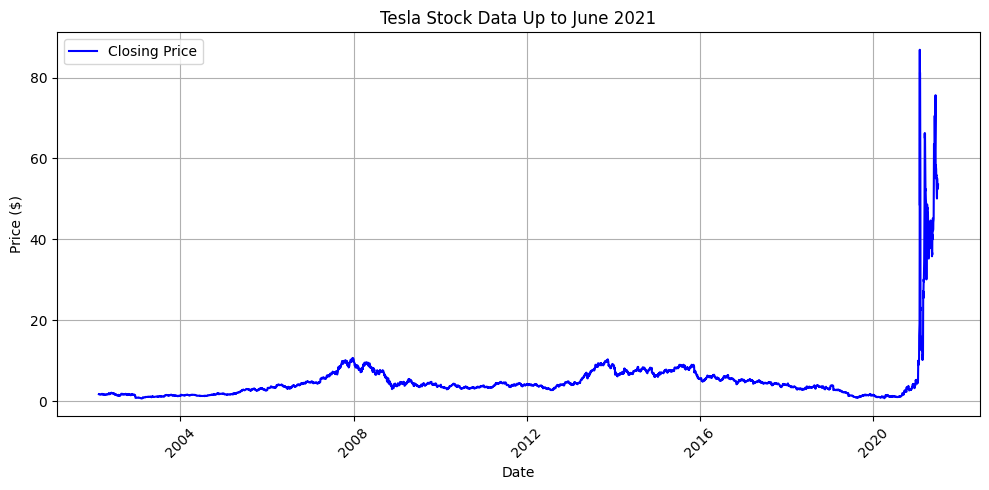

In [24]:
# Function to create a graph (assuming you have this defined)
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
# Filter the gme_data to only include data up to June 2021
filtered_data = gme_data[gme_data['Date'] <= '2021-06-30']
# Call the make_graph function with the filtered data and a title
make_graph(filtered_data, "Tesla Stock Data Up to June 2021")

## Question 6: Plot GameStop Stock Graph

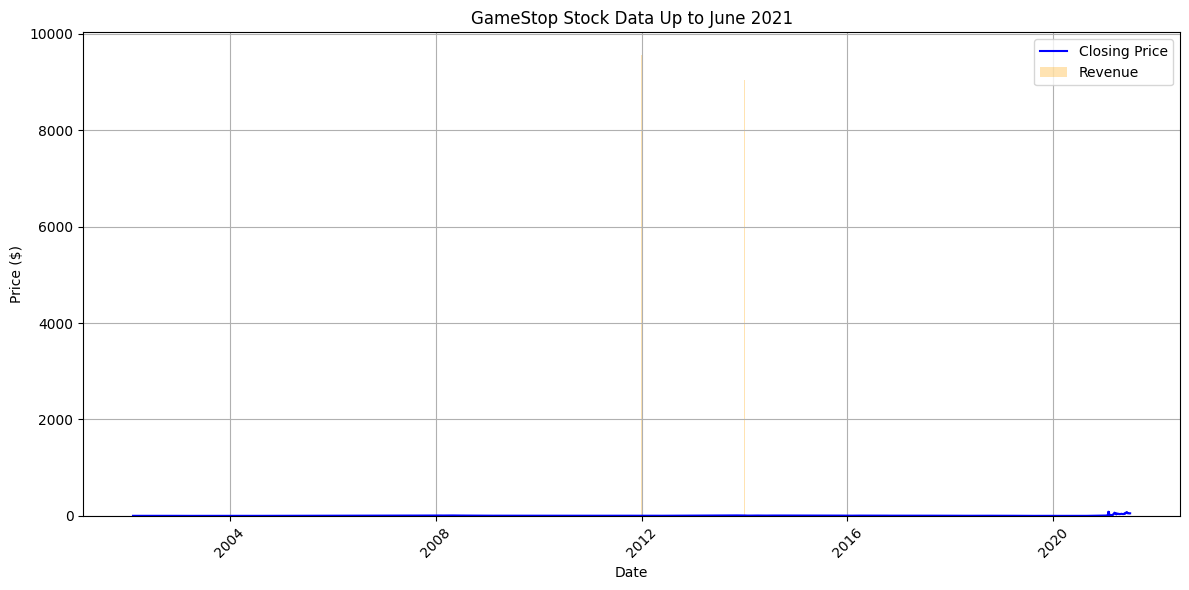

In [25]:
# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))
    # Plot the closing price from the stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')
    # Optionally, plot revenue data if it's relevant to your graph
    # For example, using bar plots for revenue
    plt.bar(revenue_data['Date'], revenue_data['Revenue'].astype(float), label='Revenue', alpha=0.3, color='orange')
    plt.title(f"{title} Stock Data Up to June 2021")
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
# Filter the gme_data to include only data up to June 2021
filtered_gme_data = gme_data[gme_data['Date'] <= '2021-06-30']
# Call the make_graph function with the filtered data and a title
make_graph(filtered_gme_data, gme_revenue, 'GameStop')